<a href="https://colab.research.google.com/github/elakkiya-02/PortfolioProjects/blob/main/KMeansClustering_IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

In [1]:
#read the data

import pandas as pd
iris_data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x_data = iris_data.iloc[:, 1:-1].values
x_data.shape

(150, 4)

In [8]:
y_data = iris_data.iloc[:,-1].values

In [10]:
#splitting the dataset to train and test set

from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.20, random_state = 0)

In [12]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

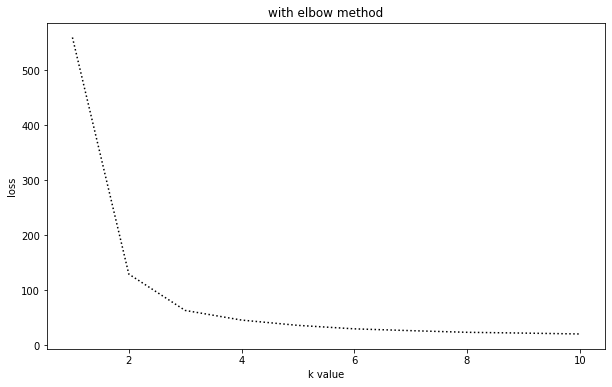

In [24]:
loss = []
#range from 1 to 10
k_range = range(1,11)

for i in k_range:
  kmc = KMeans(n_clusters = i)
  kmc = kmc.fit(x_train)
  loss.append(kmc.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), loss, color = 'black', linestyle='dotted')
plt.title('with elbow method')
plt.xlabel('k value')
plt.ylabel('loss')
plt.show()


In [26]:
#clusters = 3

kmc = KMeans(n_clusters=3)
kmc.fit(x_train)

y_pred = kmc.predict(x_test)
y_pred


array([0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

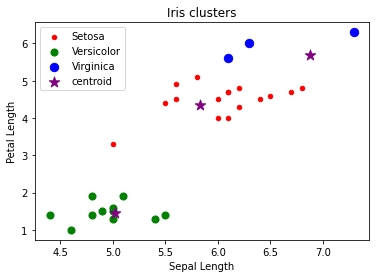

In [28]:
# centroids
centres = kmc.cluster_centers_
# Plotting the clusters
plt.scatter(x_test[y_pred == 0, 0], x_test[y_pred == 0, 2], s = 20, c = 'red', label = 'Setosa')
plt.scatter(x_test[y_pred == 1, 0], x_test[y_pred == 1, 2], s = 50, c = 'green', label = 'Versicolor')
plt.scatter(x_test[y_pred == 2, 0], x_test[y_pred == 2, 2], s = 70, c = 'blue', label = 'Virginica')
plt.scatter(centres[:,0],centres[:,2],c='purple',s=120, marker='*', label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris clusters')
plt.legend()